In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Load dataset
cancer = load_breast_cancer()
X = cancer.data  # Feature matrix (NumPy array)
y = cancer.target  # Target labels (0: Malignant, 1: Benign)

# Display dataset shape
print("Dataset Shape:", X.shape)  # (569, 30)
print("Feature Names:", cancer.feature_names)


Dataset Shape: (569, 30)
Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [3]:
# Normalize feature values to [0,1] range
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
# Compute mutual information between features and target
mi_scores = mutual_info_classif(X_scaled, y)

# Print raw scores
print("\nMutual Information Scores:")
for i, score in enumerate(mi_scores):
    print(f"{cancer.feature_names[i]}: {score:.4f}")



Mutual Information Scores:
mean radius: 0.3622
mean texture: 0.1012
mean perimeter: 0.4028
mean area: 0.3586
mean smoothness: 0.0800
mean compactness: 0.2097
mean concavity: 0.3743
mean concave points: 0.4395
mean symmetry: 0.0732
mean fractal dimension: 0.0101
radius error: 0.2475
texture error: 0.0000
perimeter error: 0.2780
area error: 0.3395
smoothness error: 0.0168
compactness error: 0.0759
concavity error: 0.1169
concave points error: 0.1285
symmetry error: 0.0152
fractal dimension error: 0.0394
worst radius: 0.4558
worst texture: 0.1206
worst perimeter: 0.4734
worst area: 0.4650
worst smoothness: 0.1062
worst compactness: 0.2246
worst concavity: 0.3147
worst concave points: 0.4365
worst symmetry: 0.0953
worst fractal dimension: 0.0679


<ipython-input-5-d914e324176c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_mi_scores, y=sorted_feature_names, palette="viridis")


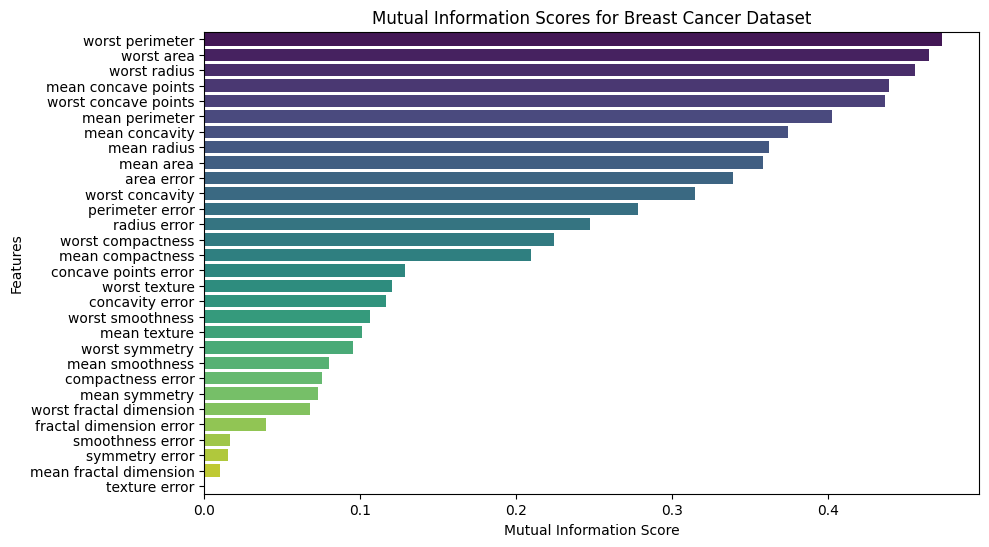

In [5]:
# Sort feature indices by MI score
sorted_indices = np.argsort(mi_scores)[::-1]
sorted_mi_scores = mi_scores[sorted_indices]
sorted_feature_names = cancer.feature_names[sorted_indices]

# Plot MI scores
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_mi_scores, y=sorted_feature_names, palette="viridis")
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.title("Mutual Information Scores for Breast Cancer Dataset")
plt.show()
